In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import pywt

In [10]:
plt.rcParams['figure.figsize'] = (12,6)

In [11]:
HAS_4_250 = pd.read_excel('../../data/pressure raw/HAS/4/250/run1.xlsx')

KeyboardInterrupt: 

In [12]:
def process(df):
    df.drop(['TIME  AXIS    - Plot 0',
           'TIME  AXIS    - Plot 1',
           'TIME  AXIS    - Plot 2',
           'TIME  AXIS    - Plot 3',
           'TIME  AXIS    - Plot 4',
           'TIME  AXIS    - Plot 5'],axis=1,inplace=True)
    
    df.dropna(inplace=True)

# High Aerated Slug

In [5]:
HAS_4_250

,TIME AXIS - Plot 0,PRESSURE AXIS RANGE 0- 0.1 BAR - Plot 0,TIME AXIS - Plot 1,PRESSURE AXIS RANGE 0- 0.1 BAR - Plot 1,TIME AXIS - Plot 2,PRESSURE AXIS RANGE 0- 0.1 BAR - Plot 2,TIME AXIS - Plot 3,PRESSURE AXIS RANGE 0- 0.1 BAR - Plot 3,TIME AXIS - Plot 4,PRESSURE AXIS RANGE 0- 0.1 BAR - Plot 4,TIME AXIS - Plot 5,PRESSURE AXIS RANGE 0- 0.1 BAR - Plot 5
0,1005640:39:02.631,0.05137,1005640:39:02.631,0.027930,1005640:39:02.631,0.028660,1005640:39:02.631,0.028660,1005640:39:02.631,0.028420,1005640:39:02.631,0.026710
1,1005640:39:02.632,0.05186,1005640:39:02.632,0.029150,1005640:39:02.632,0.029150,1005640:39:02.632,0.028420,1005640:39:02.632,0.027930,1005640:39:02.632,0.026710
2,1005640:39:02.633,0.05186,1005640:39:02.633,0.028910,1005640:39:02.633,0.028420,1005640:39:02.633,0.027200,1005640:39:02.633,0.027930,1005640:39:02.633,0.026950
3,1005640:39:02.634,0.05088,1005640:39:02.634,0.029150,1005640:39:02.634,0.028420,1005640:39:02.634,0.026950,1005640:39:02.634,0.027200,1005640:39:02.634,0.026460
4,1005640:39:02.635,0.04844,1005640:39:02.635,0.030620,1005640:39:02.635,0.027930,1005640:39:02.635,0.025730,1005640:39:02.635,0.025000,1005640:39:02.635,0.027440
...,...,...,...,...,...,...,...,...,...,...,...,...
183998,1005640:43:18.240,0.04063,1005640:43:18.240,0.017430,1005640:43:18.240,0.016700,1005640:43:18.240,0.015480,1005640:43:18.240,0.015720,1005640:43:18.240,0.015720
183999,1005640:43:18.241,0.04990,1005640:43:18.241,0.017430,1005640:43:18.241,0.017190,1005640:43:18.241,0.015970,1005640:43:18.241,0.016940,1005640:43:18.241,0.015720
184000,NaN,0.02989,NaN,0.024316,NaN,0.023236,NaN,0.021576,NaN,0.021053,NaN,0.019328
184001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010563


In [6]:
HAS_4_250_sen4 = HAS_4_250['PRESSURE    AXIS    RANGE  0- 0.1 BAR      - Plot 4'][:60000]
time = HAS_4_250.index[:60000]

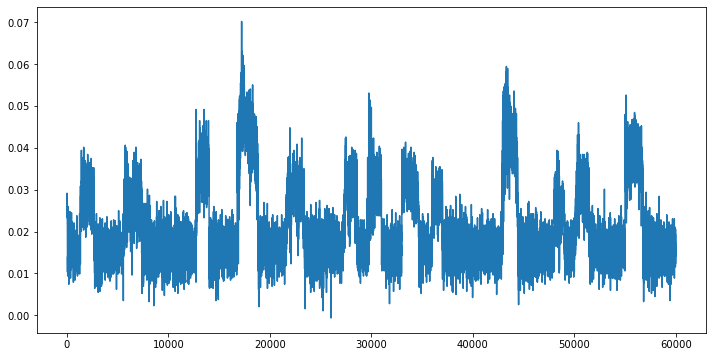

In [48]:
plt.plot(time,HAS_4_250_sen4);

In [17]:
HAS_4_250_sen4_sm = signal.savgol_filter(HAS_4_250_sen4,51,2)

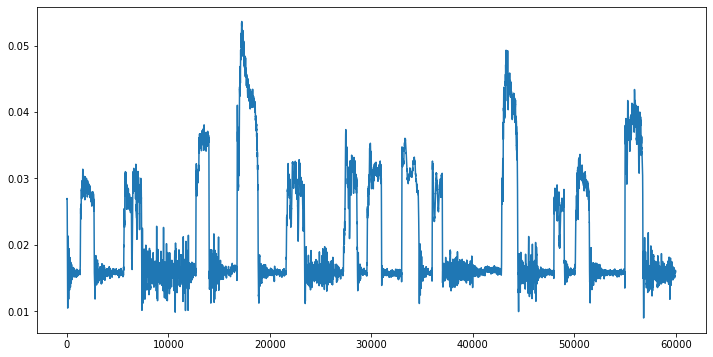

In [49]:
plt.plot(time, HAS_4_250_sen4_sm);

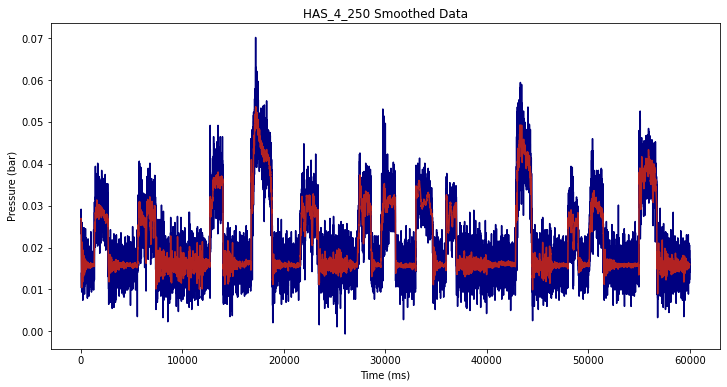

In [56]:
plt.plot(time,HAS_4_250_sen4,'navy')
plt.plot(time,HAS_4_250_sen4_sm,'firebrick')
plt.xlabel('Time (ms)')
plt.ylabel('Pressure (bar)')
plt.title('HAS_4_250 Smoothed Data')
plt.show()

In [36]:
HAS_4_250_sen4_sm = signal.detrend(HAS_4_250_sen4_sm)

In [30]:
from scipy.fft import rfft, rfftfreq

In [31]:
import warnings
warnings.filterwarnings("ignore")

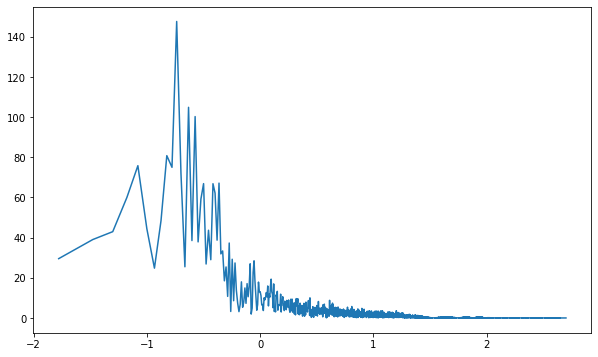

In [36]:
n = len(HAS_4_250_sen4_sm)
yf = np.abs(rfft(HAS_4_250_sen4_sm))
xf = rfftfreq(n,0.001)# log frequency # 0.001 time in millisec

plt.plot(np.log10(xf),yf);

In [37]:
xf

array([0.00000000e+00, 1.66666667e-02, 3.33333333e-02, ...,
       4.99966667e+02, 4.99983333e+02, 5.00000000e+02])

In [38]:
yf

array([1.26746329e+03, 2.95456682e+01, 3.90581147e+01, ...,
       8.46376399e-03, 5.46027137e-03, 8.73753637e-03])

In [52]:
from matplotlib import cm

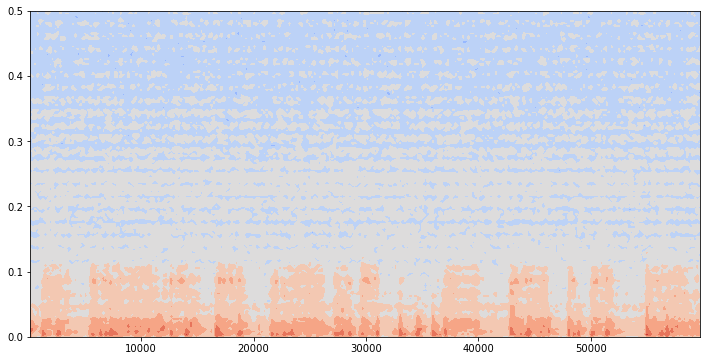

In [54]:
f,t, Sxx = signal.spectrogram(HAS_4_250_sen4_sm)
plt.contourf(t,f,np.log10(Sxx),cmap = cm.coolwarm);

In [39]:
scales = pywt.frequency2scale('mexh',xf)

AttributeError: module 'pywt' has no attribute 'frequency2scale'

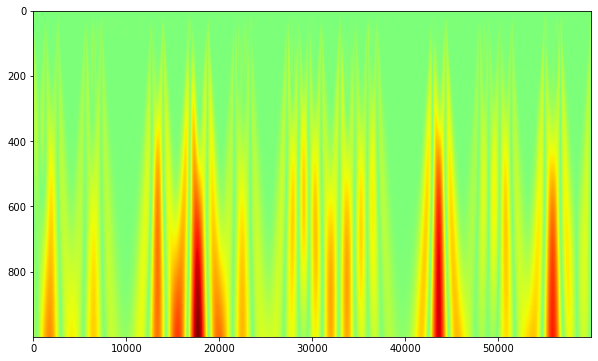

In [21]:
widths = np.arange(1,1001)
cwtmatr, freqs = pywt.cwt(HAS_4_250_sen4_sm,widths,'mexh')

plt.imshow(np.abs(cwtmatr), cmap='jet', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max());

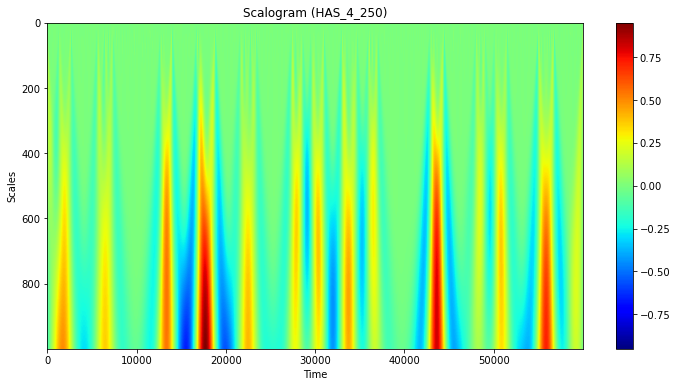

In [57]:
plt.imshow(cwtmatr, cmap='jet',aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max());
plt.colorbar()
plt.title('Scalogram (HAS_4_250)')
plt.xlabel('Time')
plt.ylabel('Scales')
plt.show()

In [7]:
HAS_5_600 = pd.read_excel('../../data/pressure raw/HAS/5.5/600/run1.xlsx')

In [8]:
HAS_5_600

,TIME AXIS - Plot 0,PRESSURE AXIS RANGE 0- 0.1 BAR - Plot 0,TIME AXIS - Plot 1,PRESSURE AXIS RANGE 0- 0.1 BAR - Plot 1,TIME AXIS - Plot 2,PRESSURE AXIS RANGE 0- 0.1 BAR - Plot 2,TIME AXIS - Plot 3,PRESSURE AXIS RANGE 0- 0.1 BAR - Plot 3,TIME AXIS - Plot 4,PRESSURE AXIS RANGE 0- 0.1 BAR - Plot 4,TIME AXIS - Plot 5,PRESSURE AXIS RANGE 0- 0.1 BAR - Plot 5
0,1005757:39:08.159,0.093850,1005757:39:08.159,0.077980,1005757:39:08.159,0.077000,1005757:39:08.159,0.07578,1005757:39:08.159,0.075050,1005757:39:08.159,0.051370
1,1005757:39:08.160,0.098970,1005757:39:08.160,0.077730,1005757:39:08.160,0.077000,1005757:39:08.160,0.07554,1005757:39:08.160,0.077000,1005757:39:08.160,0.049900
2,1005757:39:08.161,0.099710,1005757:39:08.161,0.077250,1005757:39:08.161,0.076510,1005757:39:08.161,0.07578,1005757:39:08.161,0.076760,1005757:39:08.161,0.049900
3,1005757:39:08.162,0.097020,1005757:39:08.162,0.076270,1005757:39:08.162,0.077000,1005757:39:08.162,0.07578,1005757:39:08.162,0.077490,1005757:39:08.162,0.050630
4,1005757:39:08.163,0.093120,1005757:39:08.163,0.077250,1005757:39:08.163,0.077000,1005757:39:08.163,0.07480,1005757:39:08.163,0.077000,1005757:39:08.163,0.051610
...,...,...,...,...,...,...,...,...,...,...,...,...
194998,1005757:42:55.349,0.015480,1005757:42:55.349,0.014990,1005757:42:55.349,0.014260,1005757:42:55.349,0.01401,1005757:42:55.349,0.013040,1005757:42:55.349,0.007666
194999,1005757:42:55.350,0.017190,1005757:42:55.350,0.014990,1005757:42:55.350,0.011080,1005757:42:55.350,0.01206,1005757:42:55.350,0.013040,1005757:42:55.350,0.009619
195000,NaN,0.063225,NaN,0.042845,NaN,0.040293,NaN,0.03740,NaN,0.036125,NaN,0.029945
195001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033279


In [13]:
process(HAS_5_600)

In [17]:
time = HAS_5_600_sen4.index[:60000]

In [18]:
HAS_5_600_sen4 = HAS_5_600['PRESSURE    AXIS    RANGE  0- 0.1 BAR      - Plot 4'][:60000]

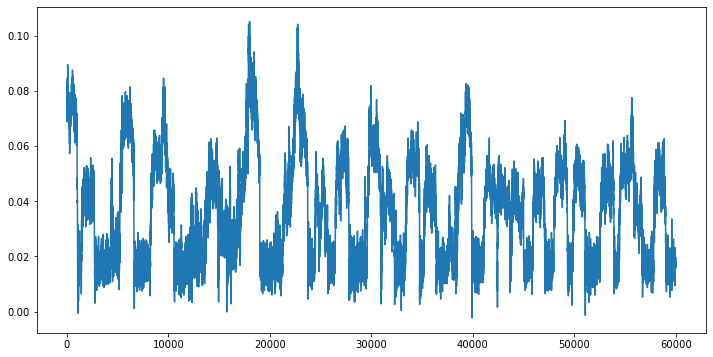

In [19]:
plt.plot(time,HAS_5_600_sen4);

In [20]:
HAS_5_600_sen4_sm = signal.savgol_filter(HAS_5_600_sen4,51,2)

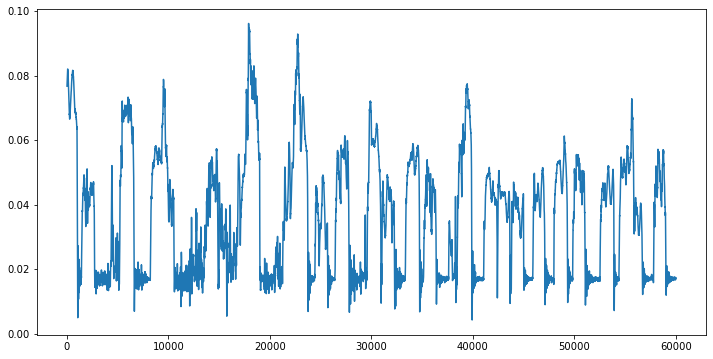

In [21]:
plt.plot(time,HAS_5_600_sen4_sm);

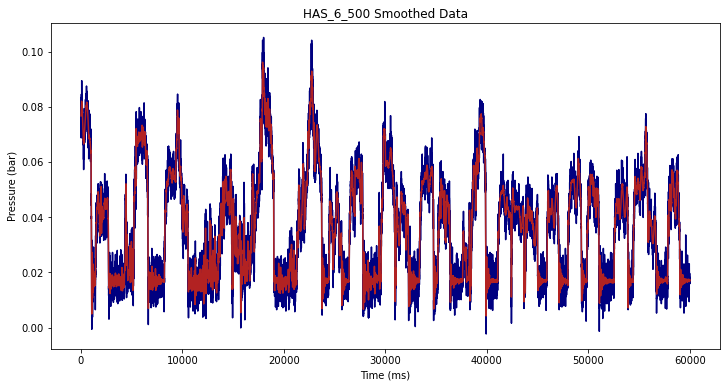

In [23]:
plt.plot(time,HAS_5_600_sen4,'navy')
plt.plot(time,HAS_5_600_sen4_sm,'firebrick')
plt.xlabel('Time (ms)')
plt.ylabel('Pressure (bar)')
plt.title('HAS_6_500 Smoothed Data')
plt.show()

In [65]:
widths = np.arange(1,1001)
cwtmatr2, freqs2 = pywt.cwt(HAS_5_600_sen4_sm,widths,'mexh')

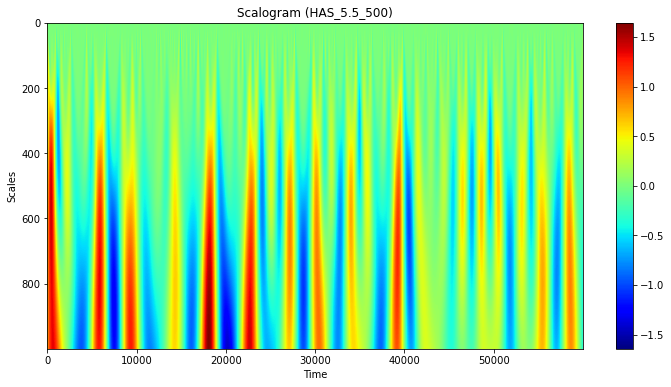

In [74]:
plt.imshow(cwtmatr2, cmap='jet',aspect='auto',vmax=abs(cwtmatr2).max(), vmin=-abs(cwtmatr2).max());
plt.colorbar()
plt.title('Scalogram (HAS_5.5_500)')
plt.xlabel('Time')
plt.ylabel('Scales')
plt.show()

In [27]:
LAS_3_600 = pd.read_excel('../../data/pressure raw/LAS/3/600/run1.xlsx')

In [28]:
LAS_3_600

,TIME AXIS - Plot 0,PRESSURE AXIS RANGE 0- 0.1 BAR - Plot 0,TIME AXIS - Plot 1,PRESSURE AXIS RANGE 0- 0.1 BAR - Plot 1,TIME AXIS - Plot 2,PRESSURE AXIS RANGE 0- 0.1 BAR - Plot 2,TIME AXIS - Plot 3,PRESSURE AXIS RANGE 0- 0.1 BAR - Plot 3,TIME AXIS - Plot 4,PRESSURE AXIS RANGE 0- 0.1 BAR - Plot 4,TIME AXIS - Plot 5,PRESSURE AXIS RANGE 0- 0.1 BAR - Plot 5
0,1005584:38:02.300,0.055270,1005584:38:02.300,0.034030,1005584:38:02.300,0.033540,1005584:38:02.300,0.032810,1005584:38:02.300,0.031590,1005584:38:02.300,0.023050
1,1005584:38:02.301,0.054790,1005584:38:02.301,0.034030,1005584:38:02.301,0.032810,1005584:38:02.301,0.029640,1005584:38:02.301,0.031590,1005584:38:02.301,0.022560
2,1005584:38:02.302,0.055030,1005584:38:02.302,0.034030,1005584:38:02.302,0.033060,1005584:38:02.302,0.031840,1005584:38:02.302,0.030860,1005584:38:02.302,0.022800
3,1005584:38:02.303,0.055760,1005584:38:02.303,0.034030,1005584:38:02.303,0.032810,1005584:38:02.303,0.032570,1005584:38:02.303,0.030370,1005584:38:02.303,0.023290
4,1005584:38:02.304,0.057230,1005584:38:02.304,0.033300,1005584:38:02.304,0.033300,1005584:38:02.304,0.031840,1005584:38:02.304,0.031590,1005584:38:02.304,0.024510
...,...,...,...,...,...,...,...,...,...,...,...,...
206999,1005584:42:05.487,0.030620,1005584:42:05.487,0.026950,1005584:42:05.487,0.025730,1005584:42:05.487,0.022800,1005584:42:05.487,0.024270,1005584:42:05.487,0.021340
207000,NaN,0.046568,NaN,0.033184,NaN,0.031226,NaN,0.028988,NaN,0.027091,NaN,0.024130
207001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022439
207002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.280484


In [29]:
process(LAS_3_600)

In [30]:
time = LAS_3_600.index[:60000]

In [31]:
LAS_3_600_sen4 = LAS_3_600['PRESSURE    AXIS    RANGE  0- 0.1 BAR      - Plot 4'][:60000]

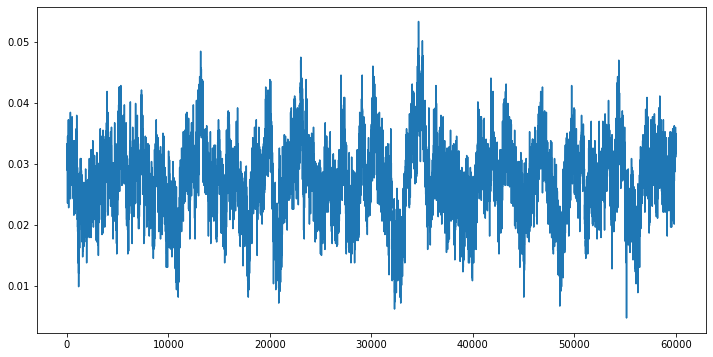

In [32]:
plt.plot(time, LAS_3_600_sen4);

In [33]:
LAS_3_600_sen4_sm = signal.savgol_filter(LAS_3_600_sen4,51,2)

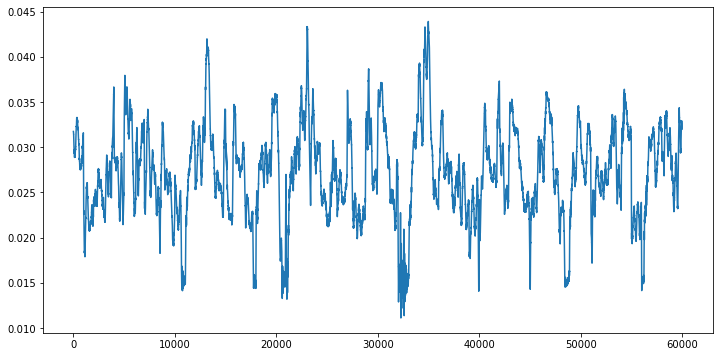

In [34]:
plt.plot(time,LAS_3_600_sen4_sm);

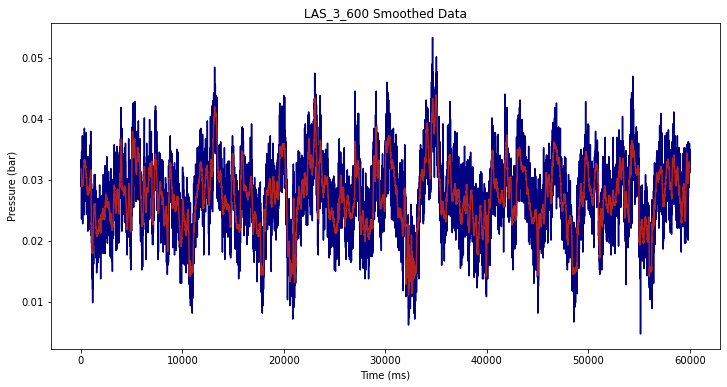

In [35]:
plt.plot(time,LAS_3_600_sen4,'navy')
plt.plot(time,LAS_3_600_sen4_sm,'firebrick')
plt.xlabel('Time (ms)')
plt.ylabel('Pressure (bar)')
plt.title('LAS_3_600 Smoothed Data')
plt.show()

In [36]:
widths = np.arange(1,1001)
cwtmatr2, freqs2 = pywt.cwt(LAS_3_600_sen4_sm,widths,'mexh')

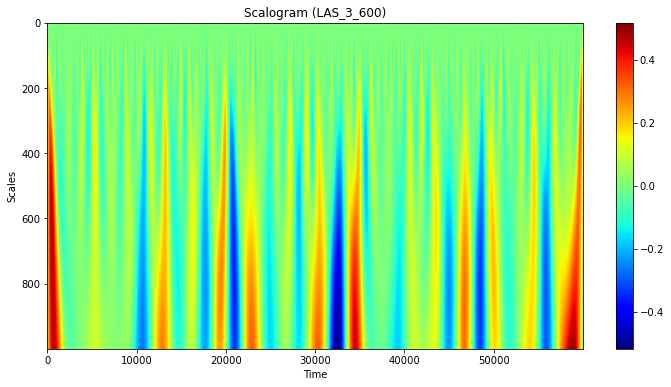

In [37]:
plt.imshow(cwtmatr2, cmap='jet',aspect='auto',
           vmax=abs(cwtmatr2).max(), vmin=-abs(cwtmatr2).max());
plt.colorbar()
plt.title('Scalogram (LAS_3_600)')
plt.xlabel('Time')
plt.ylabel('Scales')
plt.show()

In [54]:
Plug_1_600 = pd.read_excel('../../data/pressure raw/Plug/1/600/run1.xlsx')

In [55]:
Plug_1_600

,TIME AXIS - Plot 0,PRESSURE AXIS RANGE 0- 0.1 BAR - Plot 0,TIME AXIS - Plot 1,PRESSURE AXIS RANGE 0- 0.1 BAR - Plot 1,TIME AXIS - Plot 2,PRESSURE AXIS RANGE 0- 0.1 BAR - Plot 2,TIME AXIS - Plot 3,PRESSURE AXIS RANGE 0- 0.1 BAR - Plot 3,TIME AXIS - Plot 4,PRESSURE AXIS RANGE 0- 0.1 BAR - Plot 4,TIME AXIS - Plot 5,PRESSURE AXIS RANGE 0- 0.1 BAR - Plot 5,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1005509:21:20.771,0.031350,1005509:21:20.771,0.024020,1005509:21:20.771,0.023780,1005509:21:20.771,0.020120,1005509:21:20.771,0.021830,1005509:21:20.771,0.018900,NaN,NaN,NaN,0.021830,-2.070460e-10
1,1005509:21:20.772,0.031590,1005509:21:20.772,0.025240,1005509:21:20.772,0.023540,1005509:21:20.772,0.017190,1005509:21:20.772,0.021340,1005509:21:20.772,0.018900,NaN,NaN,NaN,0.021340,-1.265291e-09
2,1005509:21:20.773,0.030860,1005509:21:20.773,0.025730,1005509:21:20.773,0.023780,1005509:21:20.773,0.019870,1005509:21:20.773,0.021340,1005509:21:20.773,0.019140,NaN,NaN,NaN,0.021340,-1.265291e-09
3,1005509:21:20.774,0.030860,1005509:21:20.774,0.025240,1005509:21:20.774,0.023540,1005509:21:20.774,0.020610,1005509:21:20.774,0.021090,1005509:21:20.774,0.020120,NaN,NaN,NaN,0.021090,-2.361096e-09
4,1005509:21:20.775,0.031350,1005509:21:20.775,0.025000,1005509:21:20.775,0.024270,1005509:21:20.775,0.020120,1005509:21:20.775,0.019870,1005509:21:20.775,0.019380,NaN,NaN,NaN,0.019870,-1.661245e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173000,NaN,0.030876,NaN,0.024942,NaN,0.023778,NaN,0.022133,NaN,0.022422,NaN,0.019782,NaN,NaN,NaN,0.022422,1.879653e-04
173001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011094,NaN,NaN,NaN,0.001990,1.086505e-09
173002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.138670,NaN,NaN,NaN,173000.000000,1.378133e-01
173003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.033157,NaN,NaN,NaN,NaN,NaN


In [56]:
time = Plug_1_600.index[:60000]

In [57]:
Plug_1_600_sen4 = Plug_1_600['PRESSURE    AXIS    RANGE  0- 0.1 BAR      - Plot 4'][:60000]

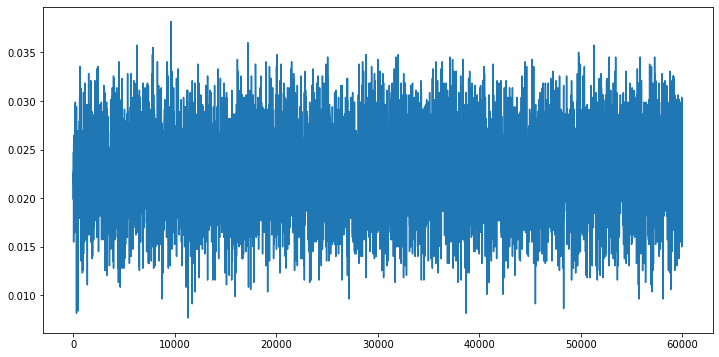

In [58]:
plt.plot(time,Plug_1_600_sen4);

In [59]:
Plug_1_600_sen4_sm = signal.savgol_filter(Plug_1_600_sen4,51,2)

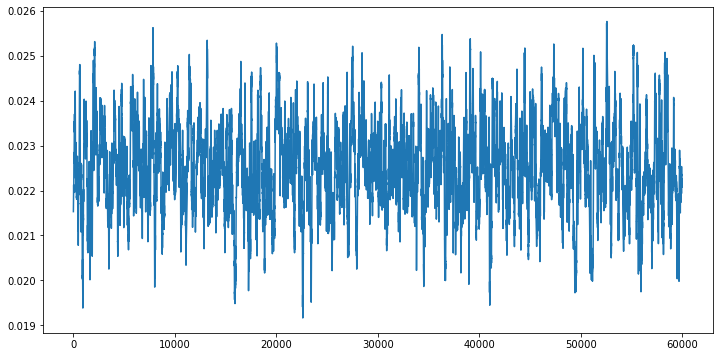

In [60]:
plt.plot(time,Plug_1_600_sen4_sm);

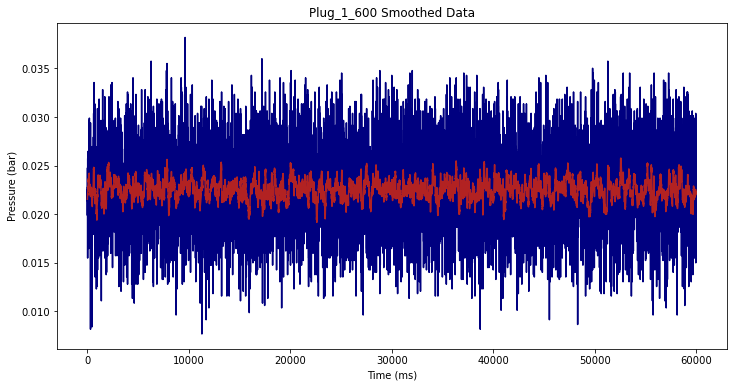

In [61]:
plt.plot(time,Plug_1_600_sen4,'navy')
plt.plot(time,Plug_1_600_sen4_sm,'firebrick')
plt.xlabel('Time (ms)')
plt.ylabel('Pressure (bar)')
plt.title('Plug_1_600 Smoothed Data')
plt.show()

In [81]:
widths = np.arange(1,1001)
cwtmatr3, freqs3 = pywt.cwt(Plug_1_600_sen4_sm,widths,'mexh')

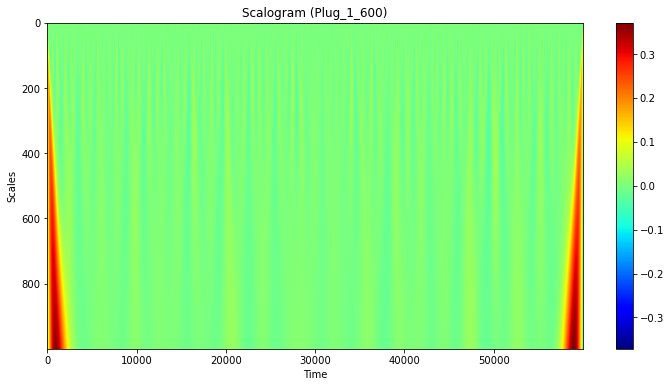

In [82]:
plt.imshow(cwtmatr3, cmap='jet',aspect='auto',vmax=abs(cwtmatr3).max(), vmin=-abs(cwtmatr3).max());

plt.colorbar()
plt.title('Scalogram (Plug_1_600)')
plt.xlabel('Time')
plt.ylabel('Scales')
plt.show()